In [1]:
# import packages
from astropy.io import fits
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from lmfit import Model, fit_report
from lmfit.models import LinearModel

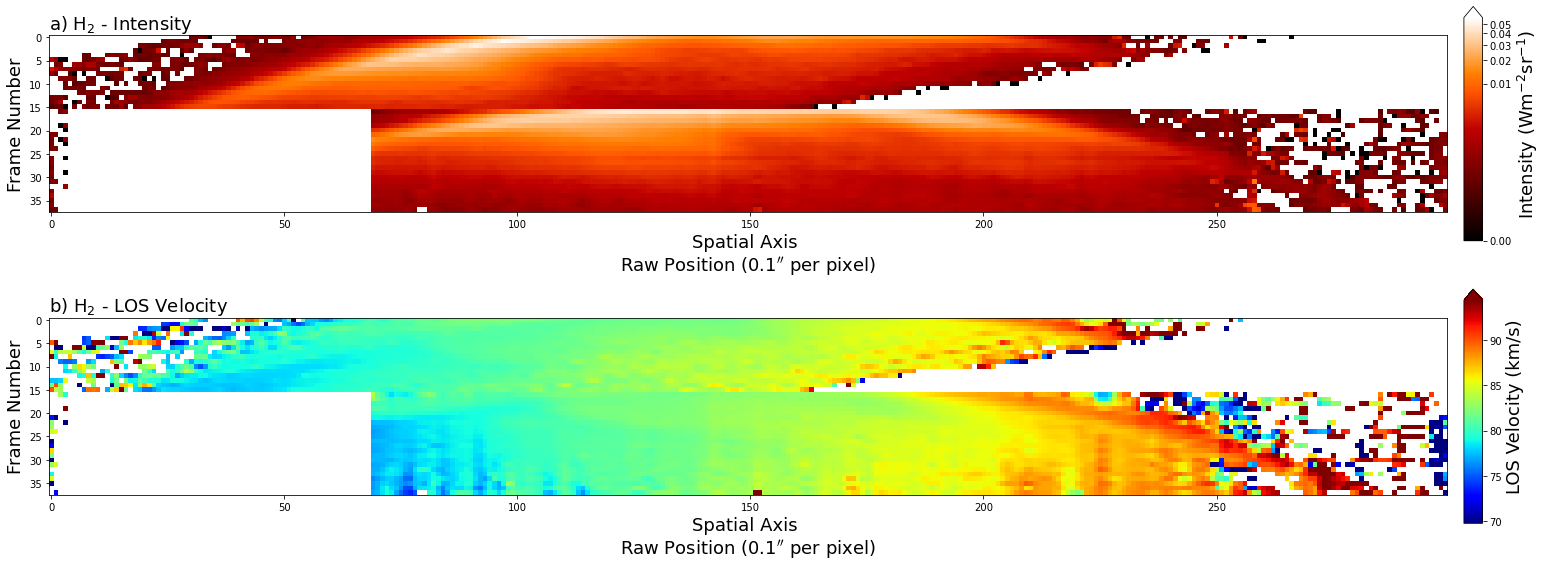

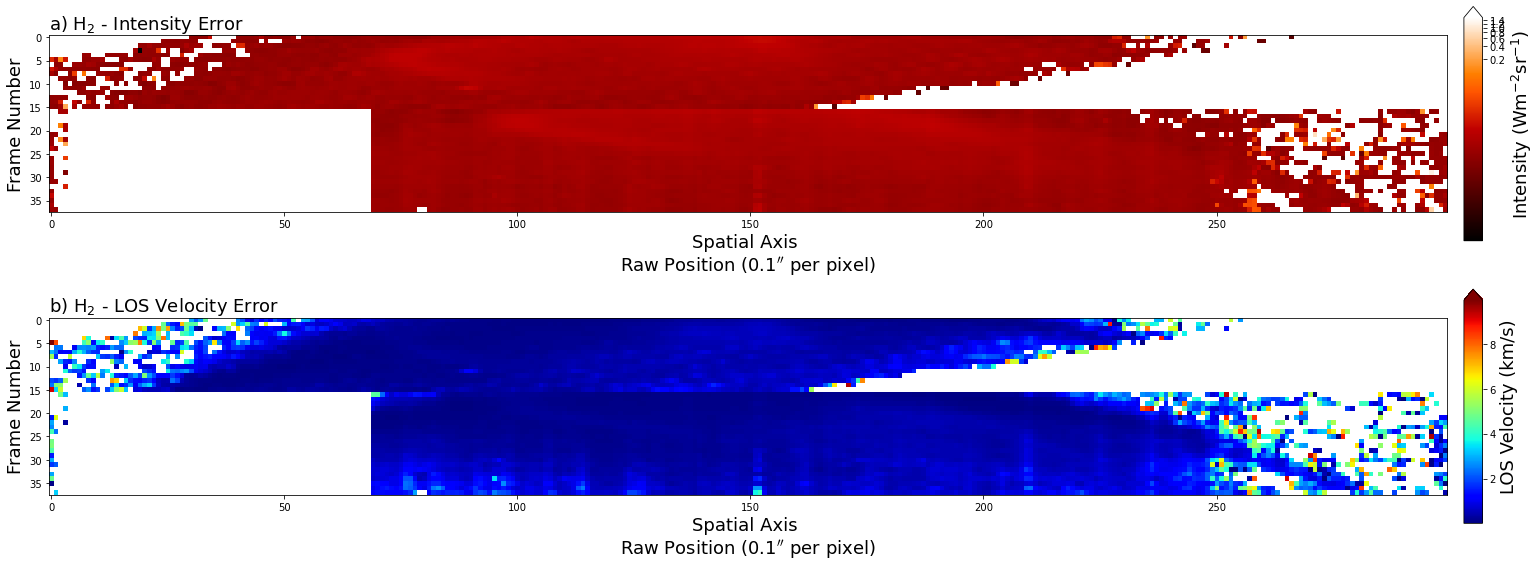

In [2]:
h2_int_shifted = fits.open('h2_int_shifted.fits', ignore_missing_end=True)[0].data
h2_los_shifted = fits.open('h2_los_shifted.fits', ignore_missing_end=True)[0].data
h2_int_shifted_error = fits.open('h2_int_shifted_error.fits', ignore_missing_end=True)[0].data
h2_los_shifted_error = fits.open('h2_los_shifted_error.fits', ignore_missing_end=True)[0].data

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(211)
plt.imshow(h2_int_shifted, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_2$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(212)
plt.imshow(h2_los_shifted, cmap='jet')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('b) H$_2$ - LOS Velocity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='LOS Velocity (km/s)',size=18)


fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(211)
# colMap = cm.gist_heat
# colMap.set_bad(color='white')
plt.imshow(h2_int_shifted_error, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.1))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_2$ - Intensity Error', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(212)
plt.imshow(h2_los_shifted_error, cmap='jet')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('b) H$_2$ - LOS Velocity Error', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='LOS Velocity (km/s)',size=18)

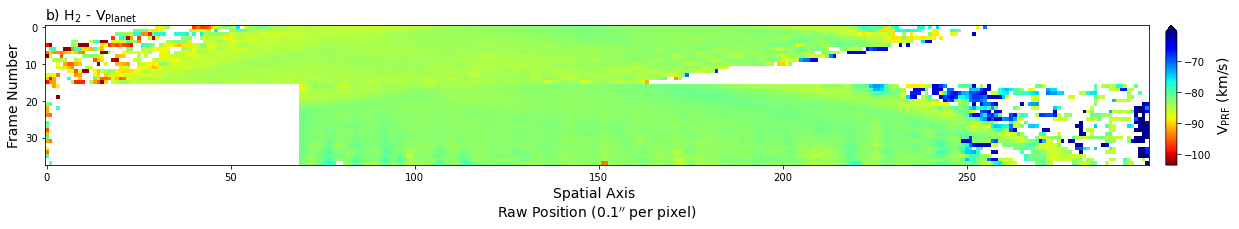

In [101]:
ang_diam = 40.58867
ang_diam/(0.1)
limb_vel = 12.572
vel_slope = limb_vel * 2 / (ang_diam/(0.1))

x = np.linspace(0,299,300)
rot_rate = vel_slope * x
rot_rate = rot_rate - rot_rate[150]

h2_plan_vel = h2_los_shifted + 0

for i in range(np.size(h2_los_shifted, 0)):
    h2_plan_vel[i,:] = h2_los_shifted[i,:] - rot_rate
    
fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(312)
plt.imshow(h2_plan_vel*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('b) H$_2$ - V$_{\mathrm{Planet}}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

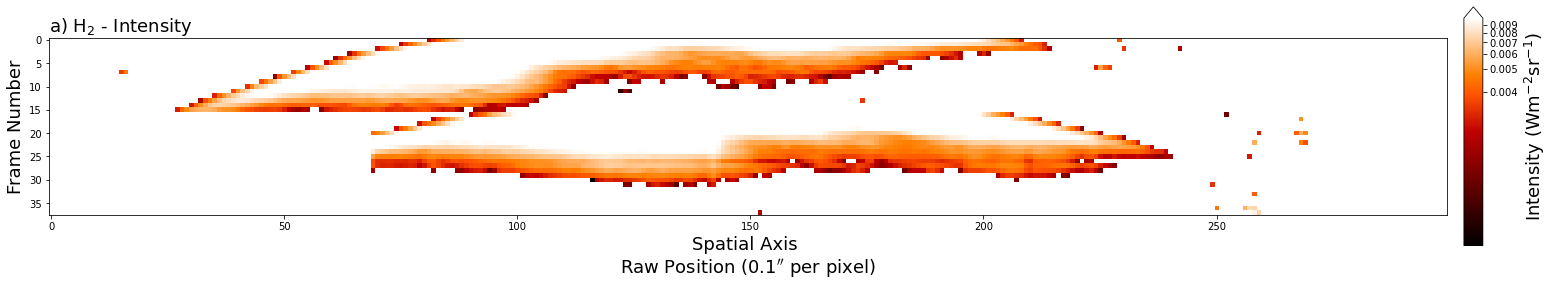

In [190]:
h2_bright2 = h2_int_shifted + 0
h2_bright2[h2_int_shifted>0.01] = np.nan
h2_bright2[h2_int_shifted<0.003] = np.nan

fig = plt.figure(figsize=(24,4), tight_layout=True)

fig.add_subplot(111)
plt.imshow(h2_bright2, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_2$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

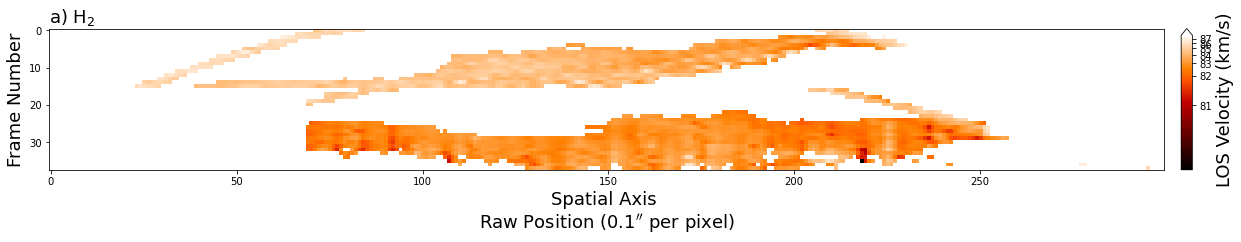

In [210]:
los_vel2 = h2_plan_vel + 0
los_vel2[h2_los_shifted_error > 3] = np.nan
los_vel2[h2_int_shifted<0.001] = np.nan
los_vel2[h2_int_shifted>0.005] = np.nan

los_vel2[h2_int_shifted_error>0.0025] = np.nan
los_vel2[los_vel2 < 80] = np.nan
los_vel2[los_vel2 > 88] = np.nan
# los_vel2[:16,:50] = np.nan
# los_vel2[:16,200:] = np.nan
# los_vel2[:16,110:][los_vel2[:16,110:] > 85.5] = np.nan
# los_vel2[:16,160:][los_vel2[:16,160:] > 85] = np.nan
# los_vel2[:16,200:][los_vel2[:16,200:] > 84] = np.nan
# los_vel2[:16,200:][los_vel2[:16,200:] < 82] = np.nan
# los_vel2[:16,140:150][los_vel2[:16,140:150] > 85] = np.nan
# los_vel2[16:,250:] = np.nan
# los_vel2[16:][los_vel2[16:] > 84] = np.nan
# los_vel2[16:][los_vel2[16:] > 92.5] = np.nan
# los_vel2[16:,:100][los_vel2[16:,:100] > 80] = np.nan
# los_vel2[16:,:100] = np.nan
# los_vel2[16:,200:] = np.nan
# los_vel2[16:][los_vel2[16:] < 79.3] = np.nan
# los_vel2[16:][los_vel2[16:] > 86.3] = np.nan

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(313)
plt.imshow(los_vel2, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_2$', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='LOS Velocity (km/s)',size=18)

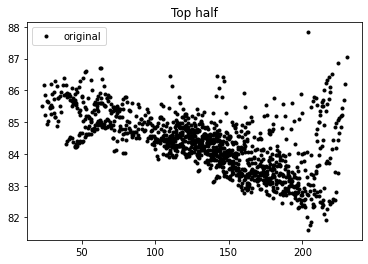

In [211]:
arr = los_vel2 + 0
for i in range(0,300):
    arr[:,i] = i
xt = arr[:16][np.isfinite(los_vel2[:16])]
vt = los_vel2[:16][np.isfinite(los_vel2[:16])]

plt.figure()
plt.plot(xt, vt,'.k', label = 'original')
# plt.vlines(110, ymin=82, ymax=87, color='b')
# plt.vlines(160, ymin=82, ymax=87, color='b')
# plt.vlines(200, ymin=82, ymax=87, color='b')
# plt.hlines(86., xmin=140, xmax=200)
plt.title('Top half')
plt.legend()

84.11984717163163
0.06076597533857754


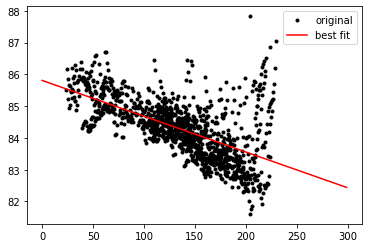

In [213]:
arr = los_vel2 + 0
for i in range(0,300):
    arr[:,i] = i
xt = arr[:16][np.isfinite(los_vel2[:16])]
vt = los_vel2[:16][np.isfinite(los_vel2[:16])]

mod = LinearModel()

pars = mod.guess(vt, x=xt)
out = mod.fit(vt, pars, x=xt)

mt = out.params['slope'].value
bt = out.params['intercept'].value
sig_mt = out.params['slope'].stderr
sig_bt = out.params['intercept'].stderr

# x_fit = np.linspace(110,219,110)
xtf = np.linspace(0,299,300)
vtf = mt * xtf + bt
vterr = np.sqrt(sig_mt**2 + sig_bt**2)

plt.figure()
plt.plot(xt, vt,'.k', label = 'original')
plt.plot(xtf, vtf, 'r', label = 'best fit')
plt.legend()

print(vtf[np.where(xtf==150)][0])
print(vterr)

Text(0.5, 1.0, 'Bottom half')

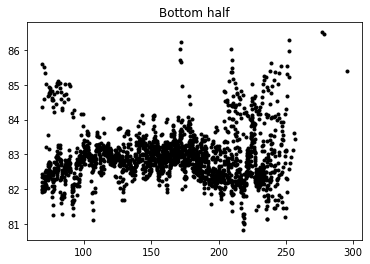

In [214]:
arr = los_vel2 + 0
for i in range(0,300):
    arr[:,i] = i
xb = arr[16:][np.isfinite(los_vel2[16:])]
vb = los_vel2[16:][np.isfinite(los_vel2[16:])]

plt.plot(xb, vb, 'k.')
plt.title('Bottom half')
# plt.hlines(79.3, xmin=60, xmax=270)
# plt.vlines(65, ymin=76, ymax=87, color='b')
# plt.vlines(95, ymin=76, ymax=87, color='b')
# plt.hlines(86.3, xmin=60, xmax=270)

82.7612632205284
0.04132274212791621


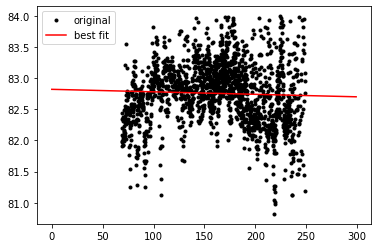

In [178]:
arr = los_vel2 + 0
for i in range(0,300):
    arr[:,i] = i
xb = arr[16:][np.isfinite(los_vel2[16:])]
vb = los_vel2[16:][np.isfinite(los_vel2[16:])]

mod = LinearModel()

pars = mod.guess(vb, x=xb)
out = mod.fit(vb, pars, x=xb)

mb = out.params['slope'].value
bb = out.params['intercept'].value
sig_mb = out.params['slope'].stderr
sig_bb = out.params['intercept'].stderr

# x_fit = np.linspace(110,219,110)
xbf = np.linspace(0,299,300)
vbf = mb * xbf + bb
vberr = np.sqrt(sig_mb**2 + sig_bb**2)

plt.figure()
plt.plot(xb, vb,'.k', label = 'original')
plt.plot(xbf, vbf, 'r', label = 'best fit')
# plt.vlines(195, ymin=82, ymax=85, color='b')
# plt.hlines(83.8, xmin=0, xmax=300)
plt.legend()

print(vbf[np.where(xbf==150)][0])
print(vberr)

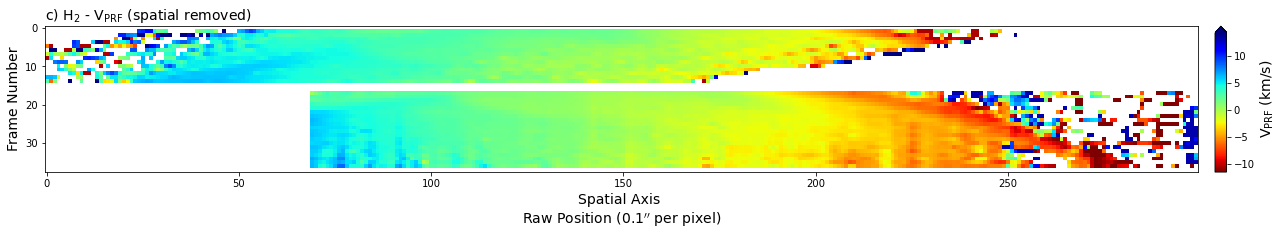

In [89]:
h2_corrected_vel_sec1 = np.delete(h2_los_shifted, np.s_[16:], axis=0)
h2_corrected_vel_sec2 = np.delete(h2_los_shifted, np.s_[:16], axis=0)

h2_vprf_sec1 = h2_corrected_vel_sec1 - vtf[np.where(xtf==150)][0]
h2_vprf_sec2 = h2_corrected_vel_sec2 - vbf[np.where(xbf==150)][0]

h2_vprf = np.vstack((h2_vprf_sec1, h2_vprf_sec2))
# h2_vprf[h2_vprf > 2] = 2
# h2_vprf[h2_vprf < -2] = -2
h2_vprf[0] = np.nan
h2_vprf[15] = np.nan
h2_vprf[16] = np.nan
h2_vprf[-1] = np.nan
h2_vprf[15:,:50] = np.nan

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(313)
plt.imshow(h2_vprf*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('c) H$_2$ - V$_{\mathrm{PRF}}$ (spatial removed)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

In [90]:
h2_los_shifted_error

array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [1.08642567e-01,            nan,            nan, ...,
        4.62186160e+00, 2.35336995e+00, 2.91647417e-05],
       [           nan,            nan,            nan, ...,
                   nan, 3.96162099e+00,            nan],
       [           nan, 3.26545603e+00,            nan, ...,
                   nan,            nan, 4.07748897e-01]])

In [91]:
h2_los_shifted_error_sec1 = np.delete(h2_los_shifted_error, np.s_[16:], axis=0)
h2_los_shifted_error_sec2 = np.delete(h2_los_shifted_error, np.s_[:16], axis=0)

In [92]:
vterr, vberr

(0.08356688458839238, 0.07039877511582078)

In [93]:
b_err = 0.3504589627160336

In [95]:
h2_tot_error_sec1 = np.sqrt((h2_los_shifted_error_sec1)**2 + (vterr)**2 + (b_err)**2)
h2_tot_error_sec2 = np.sqrt((h2_los_shifted_error_sec2)**2 + (vberr)**2 + (b_err)**2)

h2_tot_error = np.vstack((h2_tot_error_sec1, h2_tot_error_sec2))
h2_tot_error

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.37360498,        nan,        nan, ..., 4.63566416, 2.38036291,
        0.35745975],
       [       nan,        nan,        nan, ...,        nan, 3.97771522,
               nan],
       [       nan, 3.28496279,        nan, ...,        nan,        nan,
        0.54225145]])

In [ ]:
hdu1 = fits.PrimaryHDU(h2_vprf)
hdu1.writeto('h2_vprf_nonspat.fits', overwrite=True)

hdu2 = fits.PrimaryHDU(h2_tot_error)
hdu2.writeto('h2_verr_nonspat.fits', overwrite=True)